In [1]:
import os
import time
import tensorflow as tf
from tensorflow.keras import models, layers, Model, callbacks
from tensorflow.keras.metrics import AUC, Precision, Recall
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from process_data import process_data
from nn_gridsearch import logdir


pd.set_option('display.max_rows', 100)

In [2]:
data = process_data()

In [3]:
for k, v in data.items():
    print(k)
    print(type(v))

x_train
<class 'numpy.ndarray'>
x_train_processed
<class 'numpy.ndarray'>
x_test
<class 'numpy.ndarray'>
x_test_processed
<class 'numpy.ndarray'>
y_train
<class 'numpy.ndarray'>
y_test
<class 'numpy.ndarray'>
pipeline
<class 'sklearn.pipeline.Pipeline'>


In [4]:
x_train_processed = data['x_train_processed']
y_train = data['y_train']

In [5]:
x_train_processed.shape

(1047, 11)

> note: old model constrution, using Sequential API

In [6]:
#model = models.Sequential()
#model.add(layers.Dense(32, activation='relu', input_shape=(x_train_processed.shape[1],)))
#model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))


> changed to functional API --> more flexibility, for future expansion

In [7]:
input_ = layers.Input(shape=x_train_processed.shape[1:])
hidden_0 = layers.Dense(80, activation='relu')(input_)
hidden_1 = layers.Dense(80, activation='relu')(hidden_0)
hidden_2 = layers.Dense(80, activation='relu')(hidden_1)
hidden_3 = layers.Dense(80, activation='relu')(hidden_2)
hidden_4 = layers.Dense(80, activation='relu')(hidden_3)
hidden_5 = layers.Dense(80, activation='relu')(hidden_4)
output = layers.Dense(1, activation='sigmoid')(hidden_5)
model_custom = Model(inputs=[input_], outputs=[output])

In [8]:
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model_custom.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Precision(), Recall(), AUC()])

In [9]:
model_custom.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
dense (Dense)                (None, 80)                960       
_________________________________________________________________
dense_1 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_2 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_3 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_4 (Dense)              (None, 80)                6480      
_________________________________________________________________
dense_5 (Dense)              (None, 80)                6480  

In [10]:
#history = model_custom.fit(
#    data['x_train_processed'], data['y_train'], validation_split=.2, epochs=300,
#    callbacks=[
#        EarlyStopping(patience=10, monitor='val_loss', mode='min'),
#        TensorBoard(logdir('custom_model'))])

In [11]:
model_gridsearch = models.load_model('./models/titanic_gridsearch_best.h5')

In [12]:
model_gridsearch.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_0_relu_alpha_0. (None, 31)                372       
_________________________________________________________________
batch_normalization_8 (Batch (None, 31)                124       
_________________________________________________________________
activation_8 (Activation)    (None, 31)                0         
_________________________________________________________________
dropout_0_30 (Dropout)       (None, 31)                0         
_________________________________________________________________
hidden_layer_1_relu_alpha_0. (None, 31)                992       
_________________________________________________________________
batch_normalization_9 (Batch (None, 31)                124       
_________________________________________________________________
activation_9 (Activation)    (None, 31)               

In [13]:
model_custom.evaluate(data['x_test_processed'], data['y_test'])

9/9 [==============================] - 1s 19ms/step - loss: 0.6979 - accuracy: 0.4504 - precision: 0.4504 - recall: 1.0000 - auc: 0.4493


[0.6979445219039917,
 0.45038166642189026,
 0.45038166642189026,
 1.0,
 0.44932910799980164]

In [14]:
model_gridsearch.evaluate(data['x_test_processed'], data['y_test'])

9/9 [==============================] - 1s 16ms/step - loss: 0.5056 - accuracy: 0.7710 - precision_1: 0.8816 - recall_1: 0.5678 - auc_1: 0.8524


[0.5055856704711914,
 0.7709923386573792,
 0.8815789222717285,
 0.5677965879440308,
 0.8524011373519897]

> todo next - function to build model, sklearn wrapper from keras, pipelines, random grid search for model!

## experiments - progressively shrink data, compare model performance!

In [15]:
with open('./boosting_results_new.csv', mode='r') as file:
    df = pd.read_csv(file)

In [16]:
with open('./boosting_results_new_wasserstein.csv', mode='r') as file:
    df_w = pd.read_csv(file)

In [17]:
df['boostint_type'] = np.where(df['boosted_data'], 'dcgan', 'not_boosted')
df

,Unnamed: 0,model,data_boosted_x,accuracy,share_real_data,boosted_data,number_training_samples,boostint_type
0,1,<keras.engine.sequential.Sequential object at ...,0.0,0.744275,0.3,False,314,not_boosted
1,0,<keras.engine.sequential.Sequential object at ...,1.2,0.755725,0.3,True,376,dcgan
2,12,<keras.engine.sequential.Sequential object at ...,1.3,0.755725,0.3,True,408,dcgan
3,24,<keras.engine.sequential.Sequential object at ...,1.5,0.740458,0.3,True,471,dcgan
4,36,<keras.engine.sequential.Sequential object at ...,2.0,0.732824,0.3,True,628,dcgan
5,3,<keras.engine.sequential.Sequential object at ...,0.0,0.755725,0.4,False,418,not_boosted
6,2,<keras.engine.sequential.Sequential object at ...,1.2,0.744275,0.4,True,501,dcgan
7,14,<keras.engine.sequential.Sequential object at ...,1.3,0.767176,0.4,True,543,dcgan
8,26,<keras.engine.sequential.Sequential object at ...,1.5,0.751908,0.4,True,627,dcgan
9,38,<keras.engine.sequential.Sequential object at ...,2.0,0.748092,0.4,True,836,dcgan


In [18]:
with open('./boosting_results_whole_data_new_w2.csv', mode='r') as file:
    df_all = pd.read_csv(file)
    
df_all = df_all.drop_duplicates(subset=['share_real_data', 'boosted_data', 'boostint_type', 'data_boosted_x']).sort_values(['share_real_data', 'data_boosted_x'])

In [19]:
df = pd.concat((df, df_w, df_all))

In [20]:
df.rename(columns={'boostint_type': 'boosting_type'}, inplace=True)

In [21]:
df.sort_values(by=['share_real_data', 'data_boosted_x'])

,Unnamed: 0,model,data_boosted_x,accuracy,share_real_data,boosted_data,number_training_samples,boosting_type
0,1,<keras.engine.sequential.Sequential object at ...,0.0,0.744275,0.3,False,314,not_boosted
1,0,<keras.engine.sequential.Sequential object at ...,1.2,0.755725,0.3,True,376,dcgan
0,0,<keras.engine.sequential.Sequential object at ...,1.2,0.770992,0.3,True,376,wasserstein
2,12,<keras.engine.sequential.Sequential object at ...,1.3,0.755725,0.3,True,408,dcgan
1,6,<keras.engine.sequential.Sequential object at ...,1.3,0.744275,0.3,True,408,wasserstein
3,24,<keras.engine.sequential.Sequential object at ...,1.5,0.740458,0.3,True,471,dcgan
2,12,<keras.engine.sequential.Sequential object at ...,1.5,0.755725,0.3,True,471,wasserstein
4,36,<keras.engine.sequential.Sequential object at ...,2.0,0.732824,0.3,True,628,dcgan
3,18,<keras.engine.sequential.Sequential object at ...,2.0,0.751908,0.3,True,628,wasserstein
5,3,<keras.engine.sequential.Sequential object at ...,0.0,0.755725,0.4,False,418,not_boosted


In [22]:
import seaborn as sns

In [23]:
accuracies = df.loc[df['boosting_type']=='not_boosted', ['accuracy', 'share_real_data']]
accuracies['accuracy'].to_list()

[0.7442747950553894,
 0.7557252049446106,
 0.7519084215164185,
 0.7480915784835815,
 0.7633587718009949,
 0.767175555229187,
 0.7519084215164185]

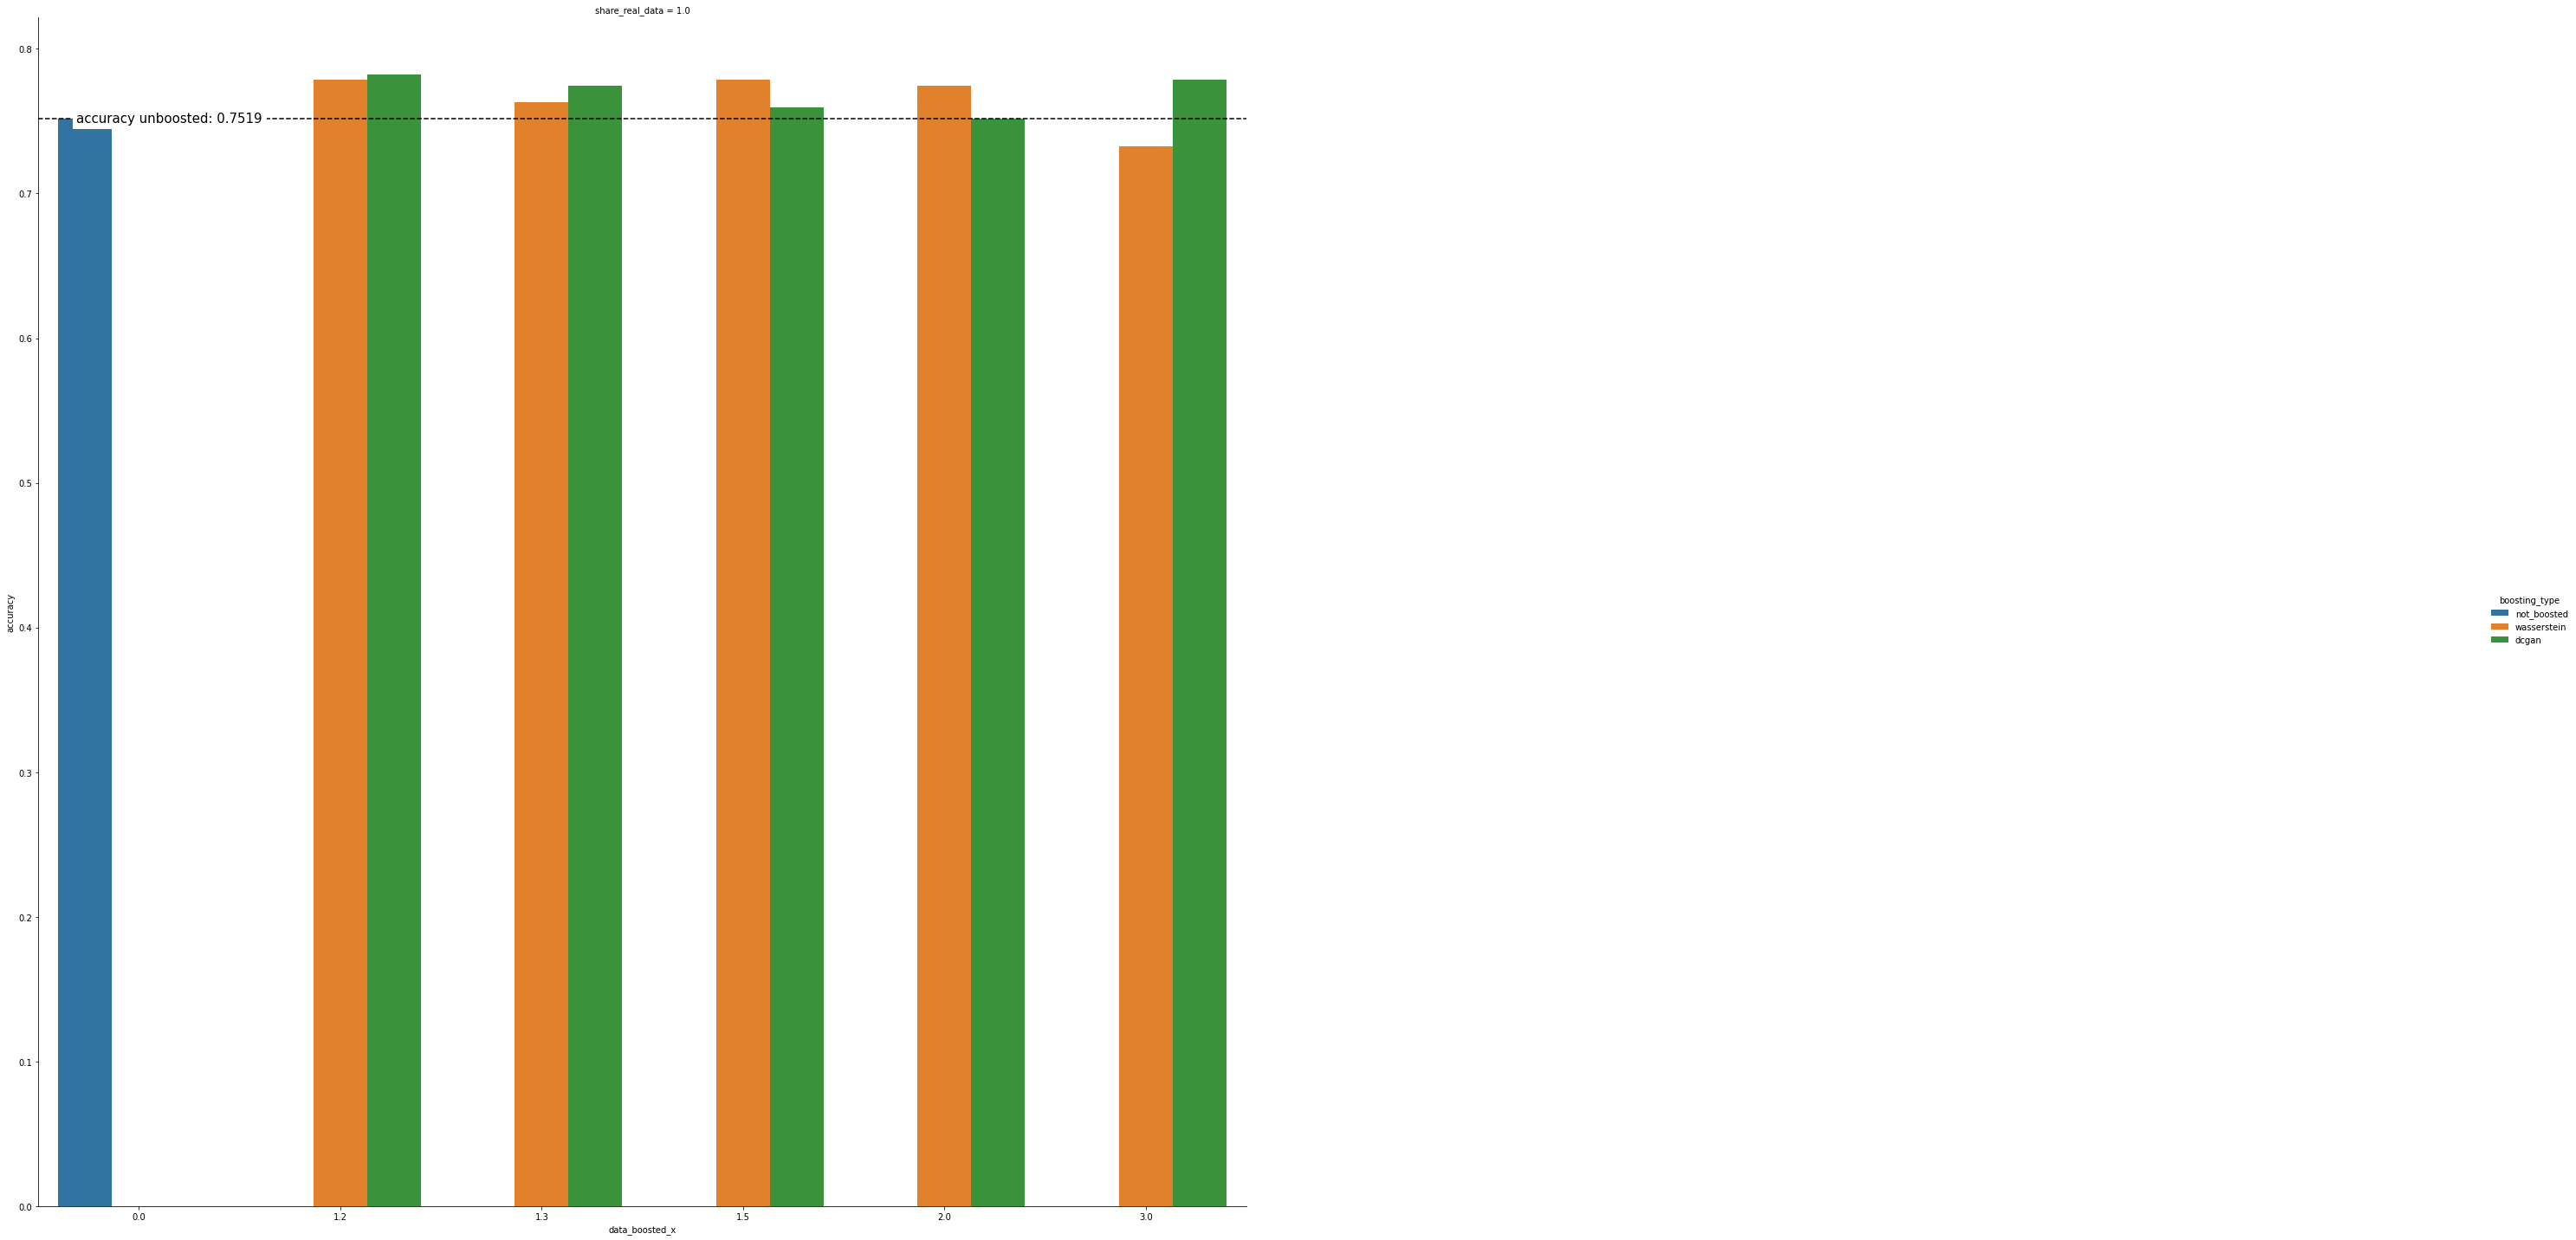

In [36]:
accuracies = df.loc[(df['boosting_type']=='not_boosted') & (df['share_real_data']==1), ['accuracy', 'share_real_data']]
accuracies['accuracy'].to_list()

c = sns.catplot(
    x='data_boosted_x', 
    hue='boosting_type', 
    y='accuracy', 
    data=df.loc[df['share_real_data']==1], 
    col='share_real_data',
    col_wrap=2,
    kind='bar',
    height=20)

axes = c.axes.flatten()
for i, ax in enumerate(axes):
    accuracy = accuracies['accuracy'].to_list()[i]
    
    ax.axhline(accuracy, ls='--', c='black')
    ax.text(0.15, accuracy, 
            f'accuracy unboosted: {round(accuracy, 4)}', 
            fontsize=15, va='center', ha='center', backgroundcolor='w')

plt.savefig('./titanic_boosting_experiments_part_4.jpg')
plt.show()

In [ ]:
with open('./boosting_results_extreme.csv', mode='r') as file:
    df_m = pd.read_csv(file)
    
df_m.rename(columns={'boostint_type': 'boosting_type'}, inplace=True)

In [ ]:
c = sns.catplot(
    x='data_boosted_x', 
    hue='boosting_type', 
    y='accuracy', 
    data=df_m, 
    col='share_real_data',
    col_wrap=2,
    kind='bar',
    height=20)

plt.legend(fontsize='large', title_fontsize='40')
accuracy = accuracies['accuracy'].mean()

axes = c.axes.flatten()
for i, ax in enumerate(axes):
    
    ax.axhline(accuracy, ls='--', c='black')
    ax.text(0.15, accuracy, 
            f'accuracy unboosted: {round(accuracy, 4)}', 
            fontsize=15, va='center', ha='center', backgroundcolor='w')

plt.savefig('./titanic_boosting_experiments_extreme.jpg')
plt.show()